In [7]:
import numpy as np
from waveletFunctions import wavelet, wave_signif
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

__author__ = 'Evgeniya Predybaylo'


# WAVETEST Example Python script for WAVELET, using NINO3 SST dataset
#
# See "http://paos.colorado.edu/research/wavelets/"
# The Matlab code written January 1998 by C. Torrence is modified to Python by Evgeniya Predybaylo, December 2014
#
# Modified Oct 1999, changed Global Wavelet Spectrum (GWS) to be sideways,
#   changed all "log" to "log2", changed logarithmic axis on GWS to
#   a normal axis.
# ------------------------------------------------------------------------------------------------------------------

# READ THE DATA
sst = np.loadtxt('../nighttime-series.dat')  # input SST time series
sst = sst - np.mean(sst)
variance = np.std(sst, ddof=1) ** 2
print("variance = ", variance)

#----------C-O-M-P-U-T-A-T-I-O-N------S-T-A-R-T-S------H-E-R-E------------------------------------------------------

# normalize by standard deviation (not necessary, but makes it easier
# to compare with plot on Interactive Wavelet page, at
# "http://paos.colorado.edu/research/wavelets/plot/"
if 1:
    variance = 1.0
    sst = sst / np.std(sst, ddof=1)
n = len(sst)
dt = 1
time = np.arange(len(sst)) * dt  # construct time array
xlim = ([1, 4026])  # plotting range
pad = 1  # pad the time series with zeroes (recommended)
dj = 0.125  # this will do 4 sub-octaves per octave
s0 = 7 * dt  # this says start at a scale of 6 months
j1 = 7 / dj  # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72  # lag-1 autocorrelation for red noise background
print("lag1 = ", lag1)
mother = 'MORLET'

# Wavelet transform:
wave, period, scale, coi = wavelet(sst, dt, pad, dj, s0, j1, mother)
power = (np.abs(wave)) ** 2  # compute wavelet power spectrum
global_ws = (np.sum(power, axis=1) / n)  # time-average over all times

# Significance levels:
signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
    lag1=lag1, mother=mother)
sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])  # expand signif --> (J+1)x(N) array
sig95 = power / sig95  # where ratio > 1, power is significant

# Global wavelet spectrum & significance levels:
dof = n - scale  # the -scale corrects for padding at edges
global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,
    lag1=lag1, dof=dof, mother=mother)

# Scale-average between El Nino periods of 2--8 years
avg = np.logical_and(scale >= 2, scale < 8)
Cdelta = 0.776  # this is for the MORLET wavelet
scale_avg = scale[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])  # expand scale --> (J+1)x(N) array
scale_avg = power / scale_avg  # [Eqn(24)]
scale_avg = dj * dt / Cdelta * sum(scale_avg[avg, :])  # [Eqn(24)]
scaleavg_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=2,
    lag1=lag1, dof=([2, 7.9]), mother=mother)

#------------------------------------------------------ Plotting

variance =  6.505635108624331
lag1 =  0.72


In [8]:
# variance =  5.9489288
# global_ws = global_ws / variance

In [9]:
global_ws.argmax()

45

In [10]:
period[global_ws.argmax()]

356.8703256558287

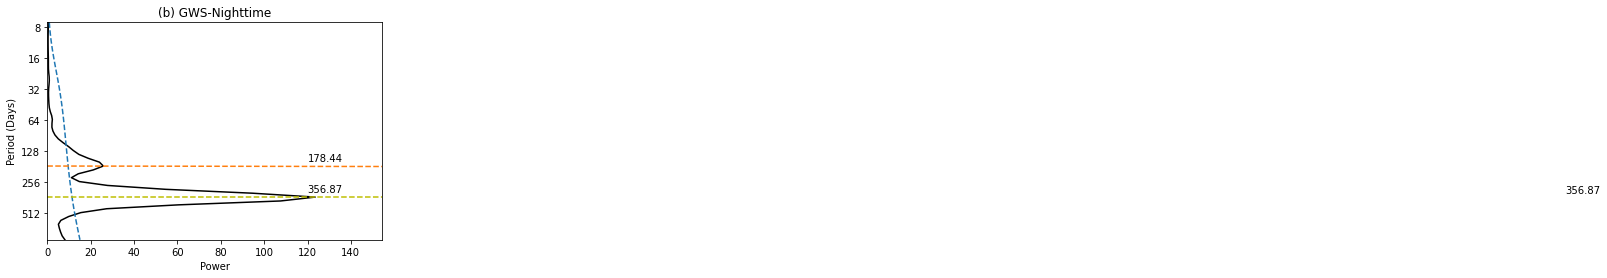

In [16]:
#--- Plot global wavelet spectrum (NIGHT)
plt4 = plt.subplot(1,1,1)
plt.plot(global_ws, period, 'k')
plt.plot(global_signif, period, '--')
plt.xlabel('Power')
plt.ylabel('Period (Days)')
plt.title('(b) GWS-Nighttime')
plt.xlim([0, 1.25 * np.max(global_ws)])
# format y-scale
plt4.set_yscale('log', basey=2, subsy=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt4.ticklabel_format(axis='y', style='plain')
plt4.invert_yaxis()
plt.plot((0, 10000), (period[global_ws.argmax()], period[global_ws.argmax()]),  'y--')
plt.plot((0, 10000), (period[global_ws[:40].argmax()], period[40+global_ws[40:50].argmax()]),  '--')
plt.text(120,  period[global_ws[:40].argmax()]-30, "%1.2f" % period[global_ws[:40].argmax()], rotation=0, verticalalignment='center')
plt.text(120, 300, "%1.2f" % period[40+global_ws[40:50].argmax()], rotation=0, verticalalignment='center')

plt.text(700, period[global_ws.argmax()]-50, "%1.2f" % period[global_ws.argmax()], rotation=0, verticalalignment='center')

# plt.show()
plt.savefig("night-Powerspectrum.png", dpi=190)
# end of code

# #--- Plot global wavelet spectrum (DAY)
# plt4 = plt.subplot(1,1,1)
# plt.plot(global_ws, period, 'k')
# plt.plot(global_signif, period, '--')
# plt.xlabel('Power')
# plt.ylabel('Period (Days)')
# plt.title('(a) GWS-Daytime')
# plt.xlim([0, 1.25 * np.max(global_ws)])
# # format y-scale
# plt4.set_yscale('log', basey=2, subsy=None)
# plt.ylim([np.min(period), np.max(period)])
# ax = plt.gca().yaxis
# ax.set_major_formatter(ticker.ScalarFormatter())
# plt4.ticklabel_format(axis='y', style='plain')
# plt4.invert_yaxis()
# plt.plot((0, 10000), (period[global_ws.argmax()], period[global_ws.argmax()]),  '--')
# plt.plot((0, 10000), (period[40+global_ws[40:50].argmax()], period[40+global_ws[40:50].argmax()]),  '--')
# plt.text(35, 300, "%1.2f" % period[40+global_ws[40:50].argmax()], rotation=0, verticalalignment='center')
# plt.text(35, 140, "%1.2f" % period[global_ws.argmax()], rotation=0, verticalalignment='center')

# # plt.show()
# plt.savefig("day-Powerspectrum.png", dpi=190)
# # end of code

In [ ]:
plt.

In [11]:
period[global_ws[40:50].argmax()]

11.152197676744647

variance =  0.5392375741582254
lag1 =  0.72


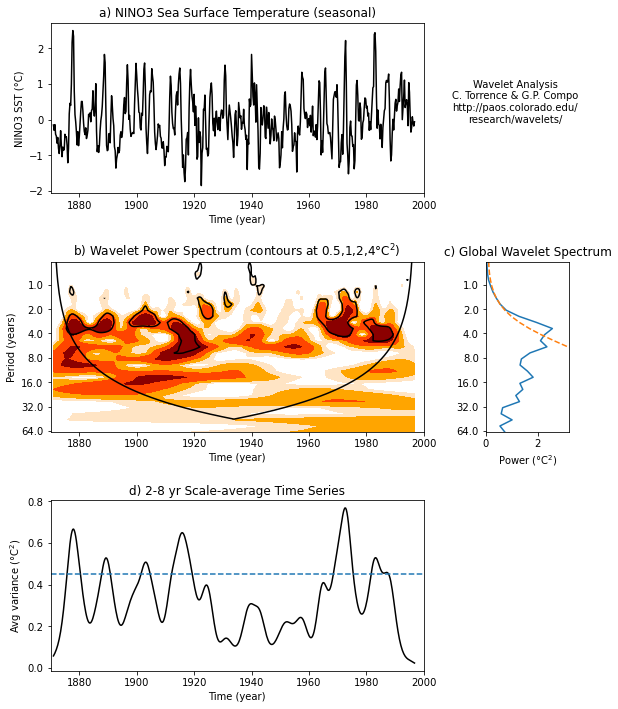

In [12]:
import numpy as np
from waveletFunctions import wavelet, wave_signif
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

__author__ = 'Evgeniya Predybaylo'


# WAVETEST Example Python script for WAVELET, using NINO3 SST dataset
#
# See "http://paos.colorado.edu/research/wavelets/"
# The Matlab code written January 1998 by C. Torrence is modified to Python by Evgeniya Predybaylo, December 2014
#
# Modified Oct 1999, changed Global Wavelet Spectrum (GWS) to be sideways,
#   changed all "log" to "log2", changed logarithmic axis on GWS to
#   a normal axis.
# ------------------------------------------------------------------------------------------------------------------

# READ THE DATA
# sst = np.loadtxt('/home/bibek/bdgsir/data/dataset2-daytime.dat')  # input SST time series
sst = np.loadtxt('sst_nino3.dat')  # input SST time series
sst = sst - np.mean(sst)
variance = np.std(sst, ddof=1) ** 2
print("variance = ", variance)

#----------C-O-M-P-U-T-A-T-I-O-N------S-T-A-R-T-S------H-E-R-E------------------------------------------------------

# normalize by standard deviation (not necessary, but makes it easier
# to compare with plot on Interactive Wavelet page, at
# "http://paos.colorado.edu/research/wavelets/plot/"
if 0:
    variance = 1.0
    sst = sst / np.std(sst, ddof=1)
n = len(sst)
dt = 0.25
time = np.arange(len(sst)) * dt + 1871.0  # construct time array
xlim = ([1870, 2000])  # plotting range
pad = 1  # pad the time series with zeroes (recommended)
dj = 0.25  # this will do 4 sub-octaves per octave
s0 = 2 * dt  # this says start at a scale of 6 months
j1 = 7 / dj  # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72  # lag-1 autocorrelation for red noise background
print("lag1 = ", lag1)
mother = 'MORLET'

# Wavelet transform:
wave, period, scale, coi = wavelet(sst, dt, pad, dj, s0, j1, mother)
power = (np.abs(wave)) ** 2  # compute wavelet power spectrum
global_ws = (np.sum(power, axis=1) / n)  # time-average over all times

# Significance levels:
signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
    lag1=lag1, mother=mother)
sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])  # expand signif --> (J+1)x(N) array
sig95 = power / sig95  # where ratio > 1, power is significant

# Global wavelet spectrum & significance levels:
dof = n - scale  # the -scale corrects for padding at edges
global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,
    lag1=lag1, dof=dof, mother=mother)

# Scale-average between El Nino periods of 2--8 years
avg = np.logical_and(scale >= 2, scale < 8)
Cdelta = 0.776  # this is for the MORLET wavelet
scale_avg = scale[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])  # expand scale --> (J+1)x(N) array
scale_avg = power / scale_avg  # [Eqn(24)]
scale_avg = dj * dt / Cdelta * sum(scale_avg[avg, :])  # [Eqn(24)]
scaleavg_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=2,
    lag1=lag1, dof=([2, 7.9]), mother=mother)

#------------------------------------------------------ Plotting

#--- Plot time series
fig = plt.figure(figsize=(9, 10))
gs = GridSpec(3, 4, hspace=0.4, wspace=0.75)
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.95, wspace=0, hspace=0)
plt.subplot(gs[0, 0:3])
plt.plot(time, sst, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('NINO3 SST (\u00B0C)')
plt.title('a) NINO3 Sea Surface Temperature (seasonal)')

plt.text(time[-1] + 35, 0.5,'Wavelet Analysis\nC. Torrence & G.P. Compo\n' +
    'http://paos.colorado.edu/\nresearch/wavelets/',
    horizontalalignment='center', verticalalignment='center')

#--- Contour plot wavelet power spectrum
# plt3 = plt.subplot(3, 1, 2)
plt3 = plt.subplot(gs[1, 0:3])
levels = [0, 0.5, 1, 2, 4, 999]
CS = plt.contourf(time, period, power, len(levels))  #*** or use 'contour'
im = plt.contourf(CS, levels=levels, colors=['white','bisque','orange','orangered','darkred'])
plt.xlabel('Time (year)')
plt.ylabel('Period (years)')
plt.title('b) Wavelet Power Spectrum (contours at 0.5,1,2,4\u00B0C$^2$)')
plt.xlim(xlim[:])
# 95# significance contour, levels at -99 (fake) and 1 (95# signif)
plt.contour(time, period, sig95, [-99, 1], colors='k')
# cone-of-influence, anything "below" is dubious
plt.plot(time, coi, 'k')
# format y-scale
plt3.set_yscale('log', basey=2, subsy=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt3.ticklabel_format(axis='y', style='plain')
plt3.invert_yaxis()
# set up the size and location of the colorbar
# position=fig.add_axes([0.5,0.36,0.2,0.01]) 
# plt.colorbar(im, cax=position, orientation='horizontal') #, fraction=0.05, pad=0.5)

# plt.subplots_adjust(right=0.7, top=0.9)

#--- Plot global wavelet spectrum
plt4 = plt.subplot(gs[1, -1])
plt.plot(global_ws, period)
plt.plot(global_signif, period, '--')
plt.xlabel('Power (\u00B0C$^2$)')
plt.title('c) Global Wavelet Spectrum')
plt.xlim([0, 1.25 * np.max(global_ws)])
# format y-scale
plt4.set_yscale('log', basey=2, subsy=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt4.ticklabel_format(axis='y', style='plain')
plt4.invert_yaxis()

# --- Plot 2--8 yr scale-average time series
plt.subplot(gs[2, 0:3])
plt.plot(time, scale_avg, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('Avg variance (\u00B0C$^2$)')
plt.title('d) 2-8 yr Scale-average Time Series')
plt.plot(xlim, scaleavg_signif + [0, 0], '--')

plt.show()

# end of code

